# Your first plot

There are many options and outputs available in `hmf`, and you can find more details of those in other tutorials or even the API documentation. In this tutorial however, we'll just show how to create a HMF with the most commonly required options. For those unfamiliar with Python, we'll also give a concrete example of how to make a plot with this data.

First, we need to import the relevant libraries:

In [1]:
from hmf import MassFunction     # The main hmf class
import matplotlib.pyplot as plt  # The necessary plotting library
import numpy as np               # Numerical array library

# This just serves to render plots inline in the notebook. Do not use in a script.
%matplotlib inline               

It may be worth mentioning before even constructing a `MassFunction` object, that we can see all possible options and parameters to the class, with their defaults, in the following way:

In [2]:
MassFunction.get_all_parameter_defaults(recursive=False)

{'cosmo_model': FlatLambdaCDM(name="Planck15", H0=67.7 km / (Mpc s), Om0=0.307, Tcmb0=2.725 K, Neff=3.05, m_nu=[0.   0.   0.06] eV, Ob0=0.0486),
 'cosmo_params': {},
 'n': 0.9667,
 'sigma_8': 0.8159,
 'growth_params': {},
 'lnk_min': -18.420680743952367,
 'lnk_max': 9.903487552536127,
 'dlnk': 0.05,
 'z': 0.0,
 'transfer_model': hmf.density_field.transfer_models.CAMB,
 'transfer_params': {},
 'takahashi': True,
 'growth_model': hmf.cosmology.growth_factor.GrowthFactor,
 'hmf_model': hmf.mass_function.fitting_functions.Tinker08,
 'Mmin': 10,
 'Mmax': 15,
 'dlog10m': 0.01,
 'mdef_model': None,
 'mdef_params': {},
 'delta_c': 1.686,
 'hmf_params': {},
 'filter_model': hmf.density_field.filters.TopHat,
 'filter_params': {}}

Furthermore, if it is unclear what some of these parameters refer to, one can use the following helpful method to find out:

In [3]:
MassFunction.parameter_info(["cosmo_model","sigma_8"])  #The parameter names passed filter the output. Call with no parameters to get info on all of them.

cosmo_model : instance of `astropy.cosmology.FLRW` subclass
    The basis for the cosmology -- see astropy documentation. Can be a custom
    subclass. Defaults to Planck15.

sigma_8 : float
    RMS linear density fluctuations in spheres of radius 8 Mpc/h



Since everything has a default, we can easily just create our object with no arguments:

In [4]:
mf = MassFunction()

The `mf` object now contains all the information it needs to calculate different quantities on demand. If you are using IPython or a notebook, then you can use tab-completion to find out what quantities are available (or you can consult the [API documentation](../api.html)). Otherwise, you can print a list of available quantities using the following:

In [8]:
print mf.quantities_available()

['M', '_dlnsdlnm', '_gtm', '_normalisation', '_power0', '_sigma_0', '_transfer', '_unn_sig8', '_unn_sigma0', '_unnormalised_lnT', '_unnormalised_power', 'cosmo', 'delta_halo', 'delta_k', 'dndlnm', 'dndlog10m', 'dndm', 'filter', 'fsigma', 'growth', 'growth_factor', 'hmf', 'how_big', 'k', 'lnsigma', 'm', 'mass_nonlinear', 'mean_density', 'mean_density0', 'n_eff', 'ngtm', 'nonlinear_delta_k', 'nonlinear_power', 'nu', 'power', 'radii', 'rho_gtm', 'rho_ltm', 'sigma', 'transfer']


The typical user might want to plot say mass vs. dn/dm, and this is most simply achieved by using matplotlib:

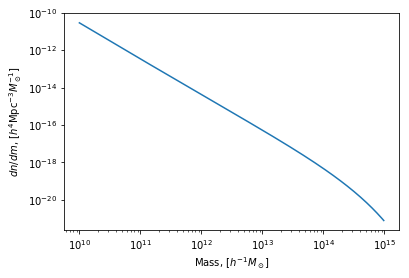

In [6]:
plt.plot(mf.m,mf.dndm)
plt.xscale('log')
plt.yscale('log')

plt.xlabel(r"Mass, $[h^{-1}M_\odot]$")
plt.ylabel(r"$dn/dm$, $[h^{4}{\rm Mpc}^{-3}M_\odot^{-1}]$");

Each quantity is saved as a `numpy` array, and so they can be directly written to file or otherwise manipulated.

The most common things one might wish to change are the cosmology, redshift and fitting function. We show how to choose different values for these below. Note that each is modified by passing it as a parameter to the constructor, where the the parameter name is the same as that printed by the `get_all_parameter_defaults1` method used above. 

In [7]:
mf = MassFunction(z = 1.0,                  # Redshift of 1.0
                  cosmo_params={"Om0":0.3}, # Matter density of 0.3
                  hmf_model="PS")           # Press-Schechter fitting function

Again we can plot the resulting mass function -- this time let's plot $f(\sigma)$ vs. $\sigma$:

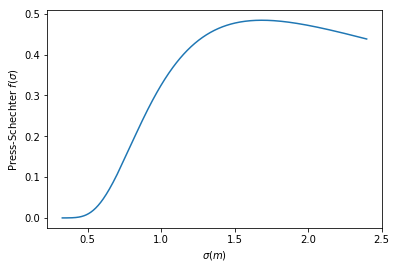

In [9]:
plt.plot(mf.sigma, mf.fsigma)

plt.xlabel(r"$\sigma(m)$")
plt.ylabel(r"Press-Schechter $f(\sigma)$");

A word of warning concerning cosmological models -- the structure parameters $\sigma_8$ and the spectral index $n_s$ are not given to the `cosmo_params` dictionary, but rather passed directly to the `MassFunction` constructor. For further information see the [cosmological parameter tutorial](deal_with_cosmology.html).

Of final note is the updating system (see the [Broad Overview Tutorial](broad_overview.html) for more information). Commonly, we would like to cycle through a range of values of a given parameter, and calculate the mass function for each them. The best (i.e. fastest) way to do this is to use `update`, like so:

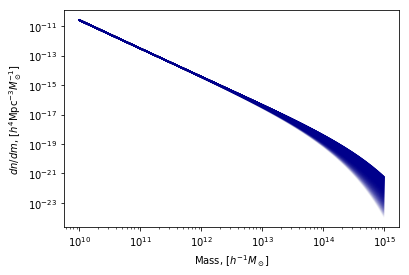

In [11]:
mf = MassFunction(cosmo_model="WMAP5") # Note how to set all cosmological parameters (except sigma_8 and n) to a given common cosmology

for z in np.linspace(0,1,100):
    mf.update(z=z)
    plt.plot(mf.m,mf.dndm,color="darkblue",alpha=1-z)
    
plt.xscale('log')
plt.yscale('log')

plt.xlabel(r"Mass, $[h^{-1}M_\odot]$")
plt.ylabel(r"$dn/dm$, $[h^{4}{\rm Mpc}^{-3}M_\odot^{-1}]$");